**Example 1.** using `SVM` to plot `decision boundaries` for 2 classes.

Firstly, we write the function as below

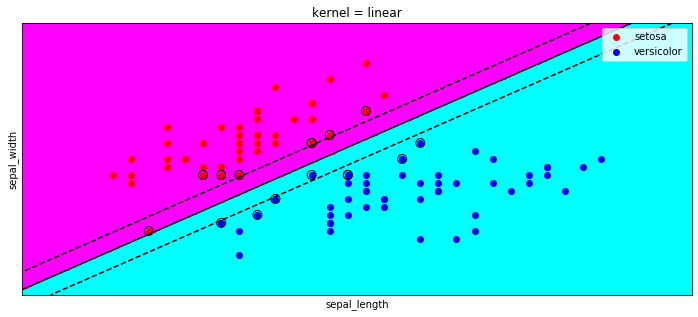

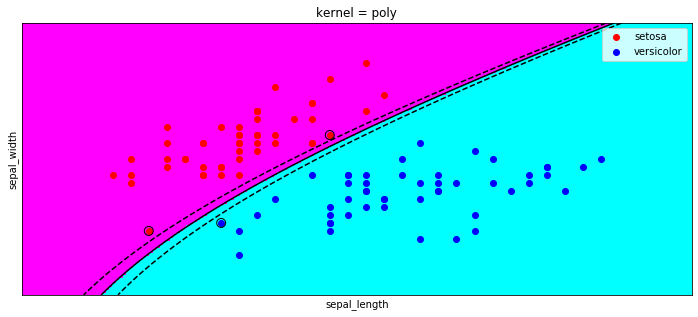

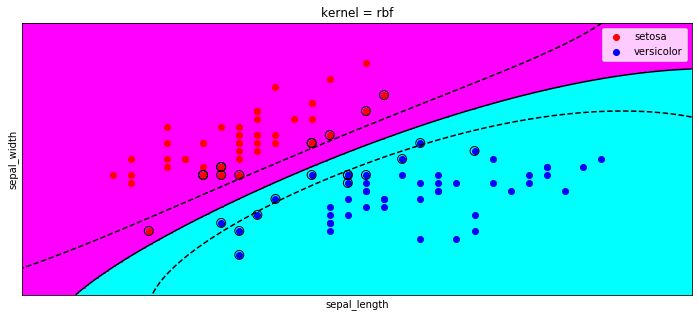

In [1]:
import seaborn as sns
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")

N = 50
fignum = 1
X = iris[['sepal_length' , 'sepal_width']][: 100].values
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # labels 
Y = y.reshape((2*N, ))

def decision_plot(X, y, kernel):
    # fit the model
    clf = SVC(kernel = kernel)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(12, 5))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                    facecolors='none', zorder=10, edgecolors='k')

    plt.axis('tight')
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(1, figsize=(7, 5))
    plt.pcolormesh(XX, YY, Z > 0, cmap= plt.cm.cool)  ## plt.cm.spring
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.scatter(X[:, 0][: 50], X[:, 1][:50], marker = 'o', color = 'red', label = "setosa")
    plt.scatter(X[:, 0][50: 100], X[:, 1][50: 100], marker = 'o', color = 'blue', label = "versicolor")
    plt.xticks(())
    plt.yticks(())
    plt.legend()
    plt.xlabel('sepal_length')
    plt.ylabel('sepal_width')
    plt.title("kernel = " + kernel)
    plt.show()
    
decision_plot(X, y, 'linear')
decision_plot(X, y, 'poly')
decision_plot(X, y, 'rbf')

Now, we will use `plot_decision_regions` from `mlxtend.plotting`

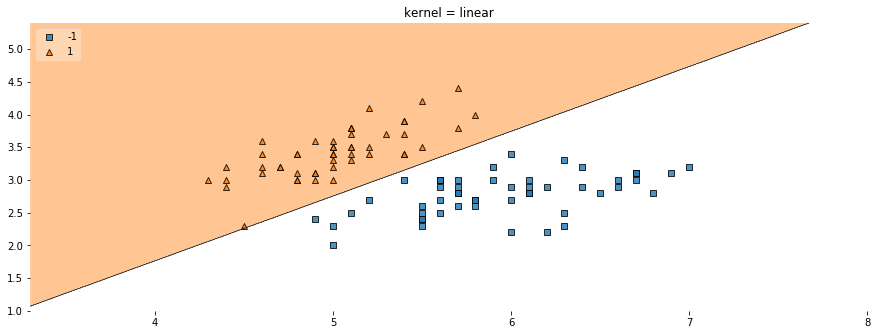

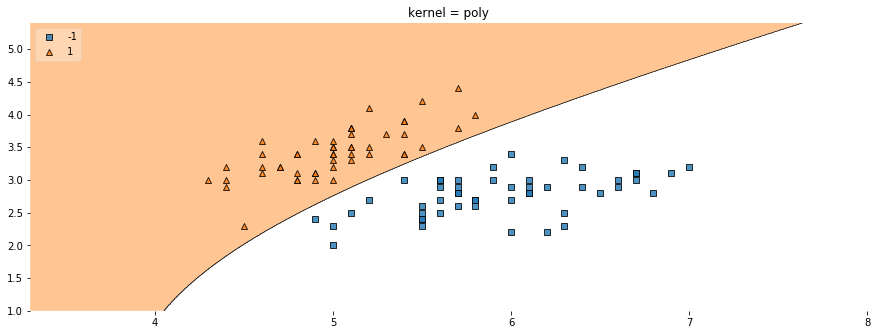

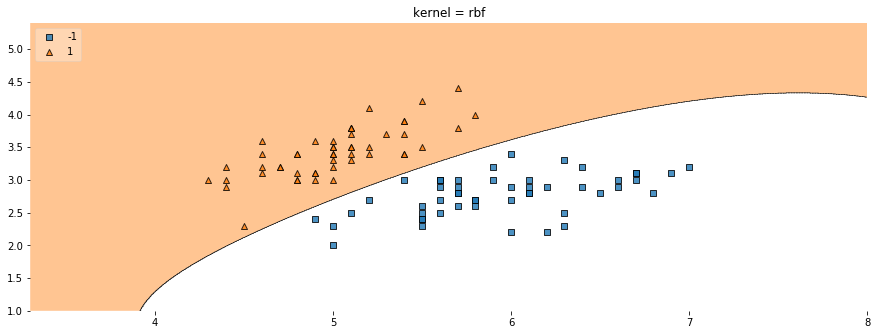

In [2]:
from mlxtend.plotting import plot_decision_regions
y = np.array(50*[1] + 50*[-1])
kernels = ['linear', 'poly', 'rbf']
for k in range(1, 4):
    plt.figure(figsize = (15, 18))
    plt.subplot(3,1,k)
    plot_decision_regions(X, y, clf = SVC(kernel = kernels[k-1]).fit(X, y), legend=2)
    plt.title("kernel = " + kernels[k-1])


**Example 2. For `multi-class`**

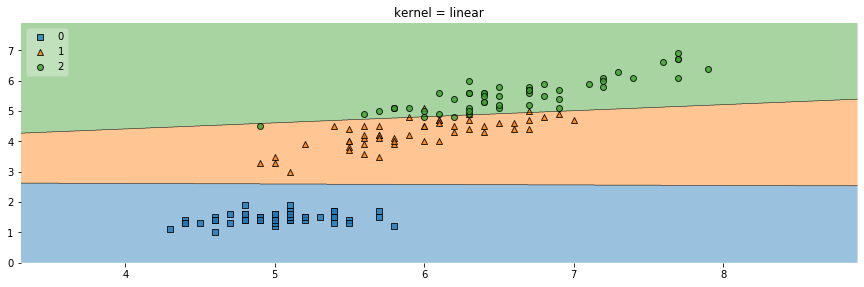

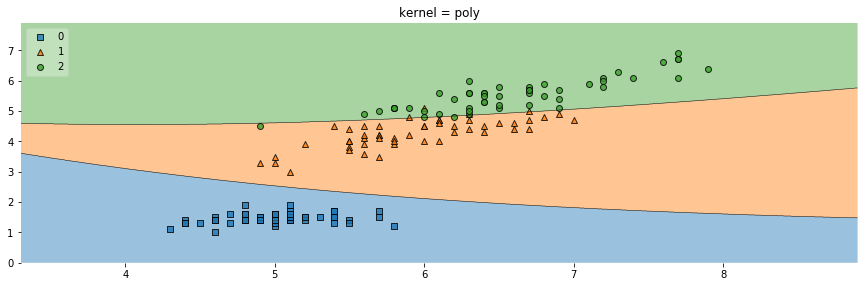

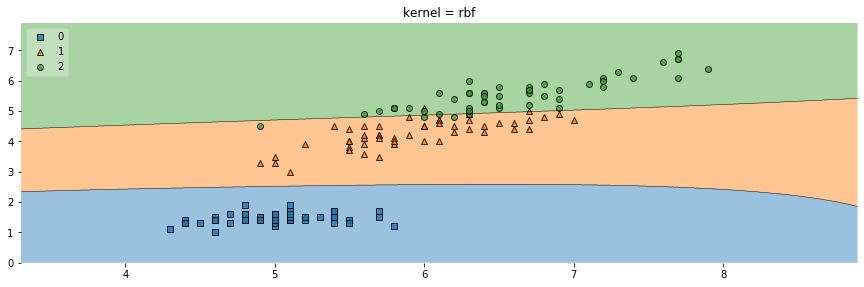

In [3]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

kernels = ['linear', 'poly', 'rbf']
for k in range(1, 4):
    plt.figure(figsize = (15, 15))
    plt.subplot(3,1,k)
    plot_decision_regions(X, y, clf = SVC(kernel = kernels[k-1]).fit(X, y), legend=2)
    plt.title("kernel = " + kernels[k-1])

**Example 3. Decision Region with `KNN, treedecision & VotingClassifier`**

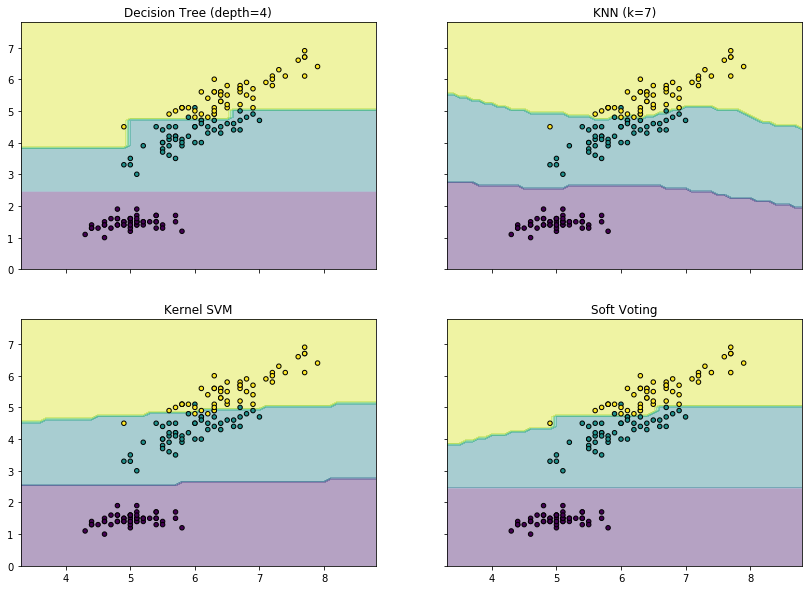

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(14, 10))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

and classifier with using `LogisticRegression, NaiveBayes, RandomForest`

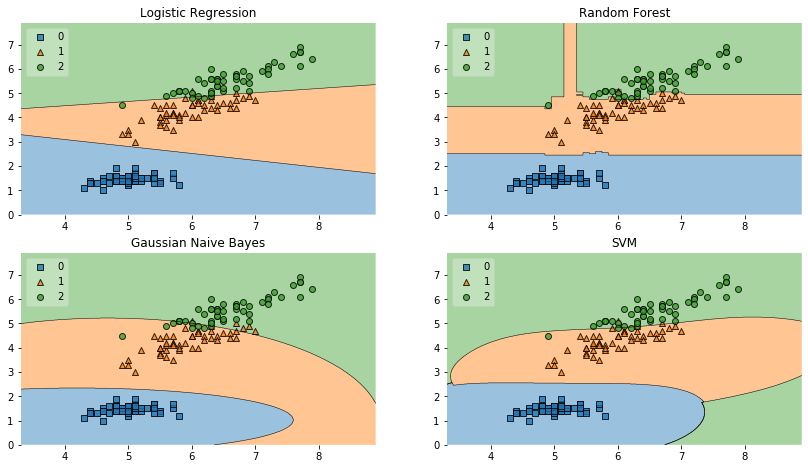

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.gridspec as gridspec
import itertools

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto')
gs = gridspec.GridSpec(3, 2)

fig = plt.figure(figsize=(14, 12))

labels = ['Logistic Regression', 'Random Forest', 'Gaussian Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()